# Retail Sales Data Cleaning, EDA, and Analysis Project

In [5]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# reading dataset csvs
features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')

In [9]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [13]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## Data Cleaning

In [16]:
# merging train, features, and stores datasets
data_df = train_df.merge(stores_df, how="inner", on="Store").merge(features_df, how="inner", on=["Store", "Date", "IsHoliday"])
data_df = data_df[["Store","Type","Size","Dept","Date","IsHoliday","Weekly_Sales","CPI","Unemployment","Temperature","Fuel_Price",
                   "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]
data_df.head()

,Store,Type,Size,Dept,Date,IsHoliday,Weekly_Sales,CPI,Unemployment,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,A,151315,1,2010-02-05,False,24924.50,211.096358,8.106,42.31,2.572,NaN,NaN,NaN,NaN,NaN
1,1,A,151315,1,2010-02-12,True,46039.49,211.242170,8.106,38.51,2.548,NaN,NaN,NaN,NaN,NaN
2,1,A,151315,1,2010-02-19,False,41595.55,211.289143,8.106,39.93,2.514,NaN,NaN,NaN,NaN,NaN
3,1,A,151315,1,2010-02-26,False,19403.54,211.319643,8.106,46.63,2.561,NaN,NaN,NaN,NaN,NaN
4,1,A,151315,1,2010-03-05,False,21827.90,211.350143,8.106,46.50,2.625,NaN,NaN,NaN,NaN,NaN


In [17]:
data_df.shape

(421570, 16)

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   IsHoliday     421570 non-null  bool   
 6   Weekly_Sales  421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Temperature   421570 non-null  float64
 10  Fuel_Price    421570 non-null  float64
 11  MarkDown1     150681 non-null  float64
 12  MarkDown2     111248 non-null  float64
 13  MarkDown3     137091 non-null  float64
 14  MarkDown4     134967 non-null  float64
 15  MarkDown5     151432 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [20]:
# fixing Date column datatype
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Weekly_Sales           float64
CPI                    float64
Unemployment           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
dtype: object

In [22]:
# dropping irrelevant columns
data_df.drop(['CPI','Unemployment','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1, inplace=True)

## EDA

In [27]:
# checking if there are non-markdown null records
data_df.isna().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [28]:
data_df.describe()

,Store,Size,Dept,Date,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570,421570.000000
mean,22.200546,136727.915739,44.260317,2011-06-18 08:30:31.963375104,15981.258123
min,1.000000,34875.000000,1.000000,2010-02-05 00:00:00,-4988.940000
25%,11.000000,93638.000000,18.000000,2010-10-08 00:00:00,2079.650000
50%,22.000000,140167.000000,37.000000,2011-06-17 00:00:00,7612.030000
75%,33.000000,202505.000000,74.000000,2012-02-24 00:00:00,20205.852500
max,45.000000,219622.000000,99.000000,2012-10-26 00:00:00,693099.360000
std,12.785297,60980.583328,30.492054,NaN,22711.183519


In [29]:
# Weekly trend
weekly_trend = data_df.groupby('Date')['Weekly_Sales'].sum().sort_index()
weekly_trend.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

In [30]:
# Monthly trend
monthly_trend = weekly_trend.resample('ME').sum()
monthly_trend.head()

Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: ME, Name: Weekly_Sales, dtype: float64

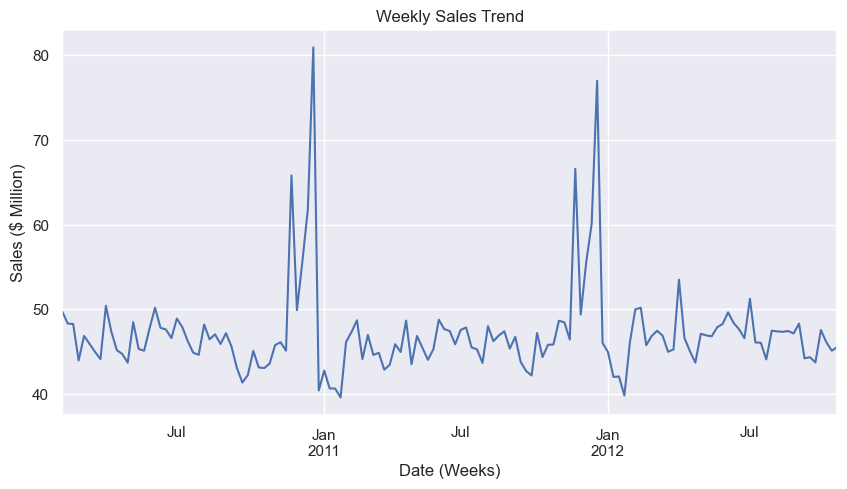

In [31]:
# plotting weekly trend
plt.figure(figsize=(10,5))
(weekly_trend/1e6).plot(
    title = 'Weekly Sales Trend',
    xlabel = 'Date (Weeks)',
    ylabel = 'Sales ($ Million)'
)
plt.show()

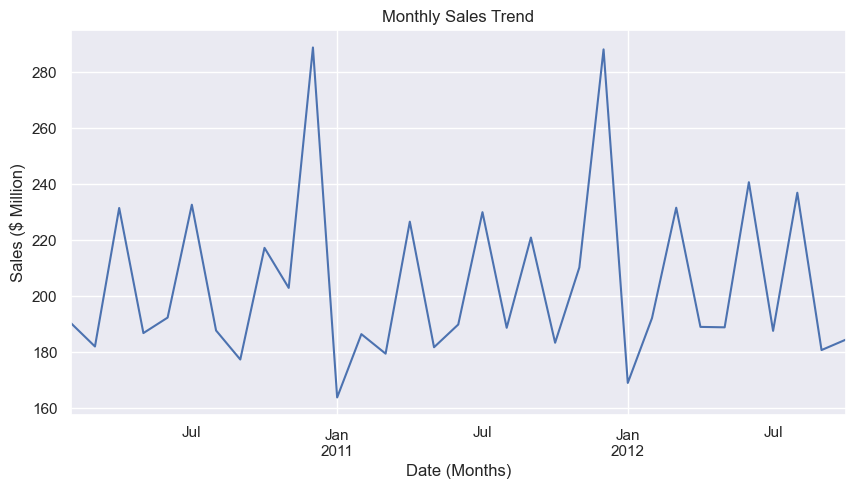

In [32]:
# plotting monthly trend
plt.figure(figsize=(10,5))
(monthly_trend/1e6).plot(
    title = 'Monthly Sales Trend',
    xlabel = 'Date (Months)',
    ylabel = 'Sales ($ Million)'
)
plt.show()

In [33]:
# top departments in terms of revenue
top_dept = data_df.groupby('Dept').agg({'Weekly_Sales':'sum'}).sort_values('Weekly_Sales', ascending=False)/1e6
top_dept.head()

,Weekly_Sales
Dept,
92,483.943342
95,449.320163
38,393.118137
72,305.725152
90,291.068464


In [34]:
# top stores in terms of revenue
top_stores = data_df.groupby('Store').agg({'Weekly_Sales':'sum'}).sort_values('Weekly_Sales', ascending=False)/1e6
top_stores.head()

,Weekly_Sales
Store,
20,301.397792
4,299.543953
14,288.999911
13,286.517704
2,275.382441


<Figure size 1000x500 with 0 Axes>

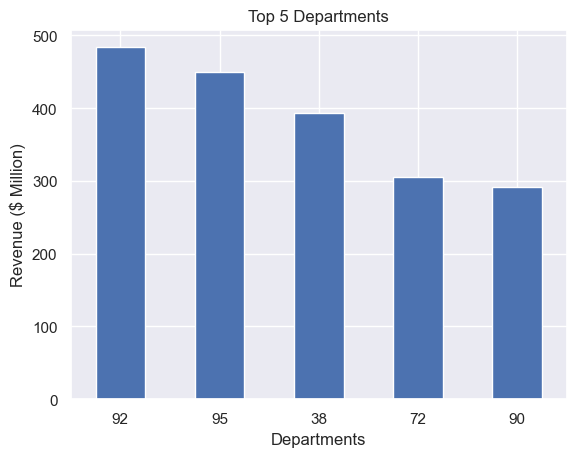

In [39]:
# plotting top 5 departments in terms of revenue
plt.figure(figsize=(10,5))
top_dept[:5].plot.bar(
    title = 'Top 5 Departments',
    xlabel = 'Departments',
    ylabel = 'Revenue ($ Million)',
    legend = None
)
plt.xticks(rotation = 0)
plt.show()

<Figure size 1000x500 with 0 Axes>

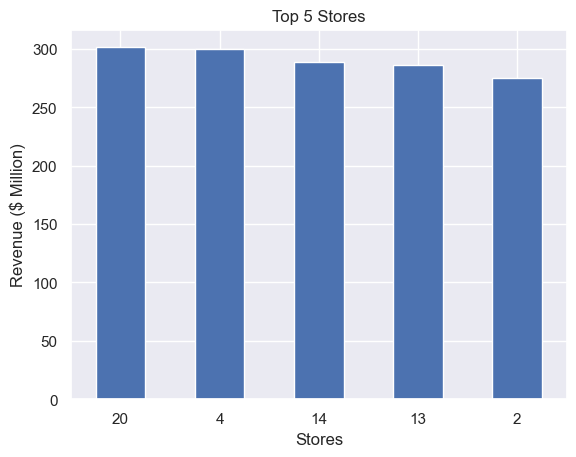

In [40]:
# plotting top 5 stores in terms of revenue
plt.figure(figsize=(10,5))
top_stores[:5].plot.bar(
    title = 'Top 5 Stores',
    xlabel = 'Stores',
    ylabel = 'Revenue ($ Million)',
    legend = None
)
plt.xticks(rotation = 0)
plt.show()

In [41]:
# monthly sales by department
monthly_dep = data_df.set_index('Date')
monthly_dep = monthly_dep.groupby('Dept')['Weekly_Sales'].resample('ME').sum().reset_index()
top5_dep_monthly = monthly_dep[monthly_dep['Dept'].isin(top_dept[:5].index.to_list())]

In [42]:
# monthly sales by store
monthly_store = data_df.set_index('Date')
monthly_store = monthly_store.groupby('Store')['Weekly_Sales'].resample('ME').sum().reset_index()
top5_stores_monthly = monthly_store[monthly_store['Store'].isin(top_stores[:5].index.to_list())]

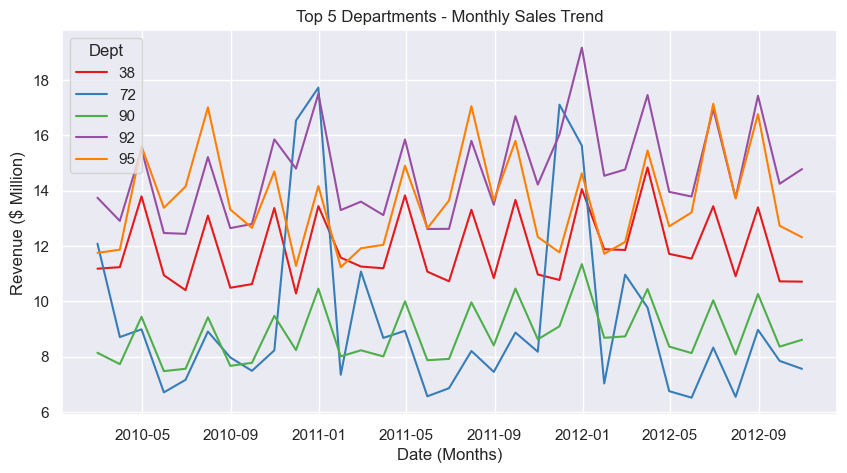

In [43]:
# plotting monthly sales by department
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    data=top5_dep_monthly,
    x=top5_dep_monthly['Date'],
    y=top5_dep_monthly['Weekly_Sales']/1e6,
    hue=top5_dep_monthly['Dept'],
    palette='Set1'
)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Revenue ($ Million)')
ax.set_title('Top 5 Departments - Monthly Sales Trend')
plt.show()

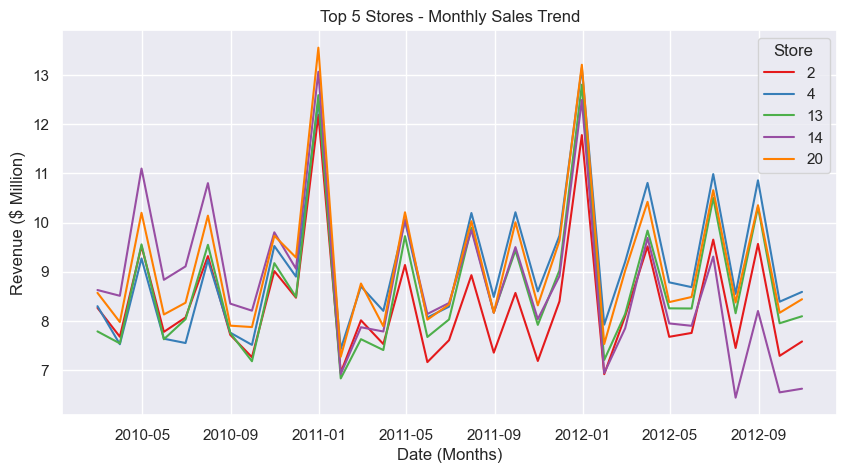

In [44]:
# plotting monthly sales by store
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    data=top5_stores_monthly,
    x=top5_stores_monthly['Date'],
    y=top5_stores_monthly['Weekly_Sales']/1e6,
    hue=top5_stores_monthly['Store'],
    palette='Set1'
)
ax.set_xlabel('Date (Months)')
ax.set_ylabel('Revenue ($ Million)')
ax.set_title('Top 5 Stores - Monthly Sales Trend')
plt.show()

In [45]:
# average weekly sales on holidays vs non-holidays
holiday = data_df.groupby('IsHoliday')['Weekly_Sales'].mean().rename({False:'Non-Holiday',True:'Holiday'})
holiday

IsHoliday
Non-Holiday    15901.445069
Holiday        17035.823187
Name: Weekly_Sales, dtype: float64

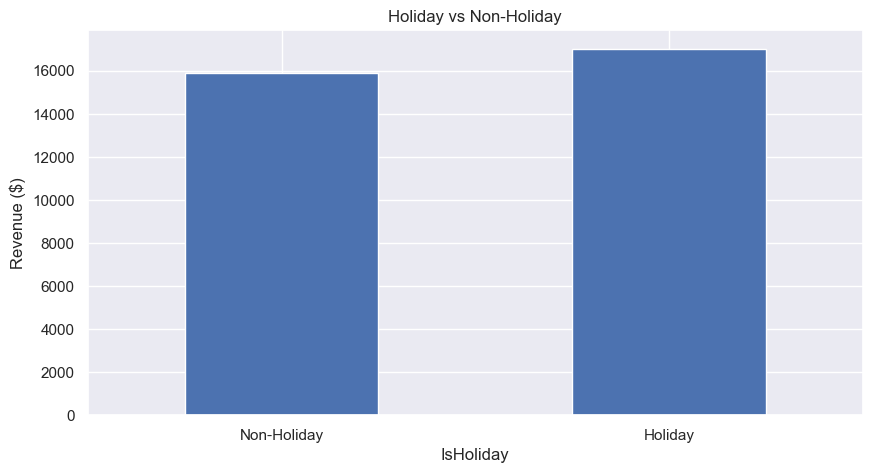

In [46]:
plt.figure(figsize=(10,5))
holiday.plot.bar(
    title = 'Holiday vs Non-Holiday',
    ylabel = 'Revenue ($)',
    legend = None
)
plt.xticks(rotation = 0)
plt.show()

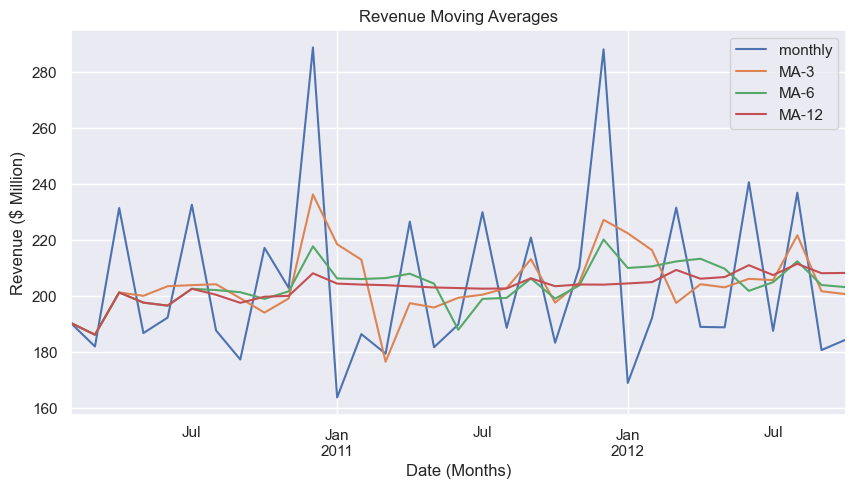

In [47]:
# plotting revenue moving averages
ma3 = monthly_trend.rolling(3, min_periods=1).mean()/1e6
ma6 = monthly_trend.rolling(6, min_periods=1).mean()/1e6
ma12 = monthly_trend.rolling(12, min_periods=1).mean()/1e6

plt.figure(figsize=(10,5))
ax = (monthly_trend/1e6).plot(label='monthly')
ma3.plot(ax=ax, label='MA-3')
ma6.plot(ax=ax, label='MA-6')
ma12.plot(ax=ax, label='MA-12')
plt.title('Revenue Moving Averages')
ax.set_xlabel ('Date (Months)')
ax.set_ylabel('Revenue ($ Million)')
ax.legend()
plt.show()

## Insights:
- Sales trend shows strong seasonality across the different months, with recurring peaks on December, probably due to it being the biggest holiday season (Christmas)

- Top 5 Stores: 20, 4, 14, 13, 2 with Store 20 outperforming with overall revenue: $301 Million, can hint to its probable unique selling point (location, size, etc)

- Top 5 Departments: 92, 95, 38, 72, 90 with Department 92 bringing the highest overall revenue: $484 Million
  

- Average weekly sales on holidays are higher than non-holidays by $1K+ (per week per store-department)

- Top 5 Stores have very similar fluctuation patterns across months, with Store 20 having the highest peak during December, may explain it being the highest revenue store

- Top 5 Departments have somewhat similar fluctuation patterns across months, with Departments 92 and 95 competing for the highest revenue positions, while it's notable that Store 72 has the highest revenue jump on December seasons, by around a $10 million gap, going from one of the lowest revenue stores to one of the highest

- Sales Moving Averages confirm the high spikes at December seasons, with the long term yearly trend being relatively stable
